<a href="https://colab.research.google.com/github/richardkilea/BINARY-CLASSIFICATION-OF-SOFTWARE-DEFECTS/blob/main/Task_4_modeling_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
## 2. Load data

In [3]:
df = pd.read_csv('/content/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  int64  
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

In [6]:
# check for missing values
df.isna().sum() # it is noted that there are no missing values

id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
forecast_cons_12m                             0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 63, dtype: int64

In [8]:
# check for missing values in the dataset
df.nunique

<bound method DataFrame.nunique of                                      id  cons_12m  cons_gas_12m  \
0      24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1      d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2      764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3      bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4      149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...                                 ...       ...           ...   
14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0             0.000000           0.000000                         0   
1             0.00

# since our data is perfect we can proceed to modelling

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [10]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [11]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [15]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


In [14]:
# Independent variables (no target column)
X.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


In [17]:
#lets check our training data again
X_train.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
740,3.803457,0.0,2.257679,2.535446,0,0.000000,0.144038,0.000000,46.311378,0,...,2,0,0,0,1,0,0,0,0,1
3468,4.334816,0.0,3.492900,3.369989,0,2.119487,0.117486,0.100597,40.606701,0,...,7,0,0,0,0,0,1,0,0,1
14013,4.696819,0.0,0.000000,3.399601,0,1.213518,0.144058,0.000000,44.311378,0,...,4,2,0,0,1,0,0,0,0,1
1188,4.660030,0.0,3.558948,3.280785,0,1.402089,0.161743,0.083849,44.311378,0,...,32,8,0,0,1,0,0,0,0,1
13098,4.073938,0.0,3.067071,3.041795,0,2.167819,0.115172,0.098283,40.606701,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
4947,4.173390,4.193598,3.165541,3.168368,0,2.073828,0.114667,0.099548,40.606701,1,...,2,1,0,0,1,0,0,0,0,1
5868,4.075036,0.000000,3.003461,3.305998,30,1.255031,0.198096,0.000000,46.305378,0,...,3,3,0,0,1,0,0,0,0,1
6805,3.848435,0.000000,0.000000,2.756568,0,1.289366,0.141434,0.000000,44.311378,0,...,5,3,0,0,1,0,0,0,0,1
1323,4.345433,0.000000,0.000000,3.516690,0,1.304921,0.142996,0.000000,44.311378,0,...,0,10,0,0,1,0,0,0,0,1
11759,4.185655,0.000000,3.355834,3.208148,0,2.123067,0.120372,0.103487,40.606701,0,...,45,9,0,0,1,0,0,0,1,0


In [19]:
y_train, len(y_train)

(740      0
 3468     0
 14013    0
 1188     0
 13098    0
         ..
 5191     0
 13418    0
 5390     0
 860      0
 7270     0
 Name: churn, Length: 11684, dtype: int64,
 11684)

### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [22]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100)
# We'll keep the default hyperparameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# fit training data into the model
model.fit(X_train, y_train);

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [39]:
# Generate predictions here
model.score(X_test, y_test)

0.9000684462696783

In [61]:
# cross validate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)

In [60]:
# Print the scores
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.90586222 0.9114249  0.90714591 0.90671801 0.91010274]


In [41]:
#  Evaluate the model on the training data and test data
model.score(X_train, y_train)

1.0

In [37]:
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Calculate performance metrics here!
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.81      0.06      0.10       305

    accuracy                           0.90      2922
   macro avg       0.86      0.53      0.53      2922
weighted avg       0.89      0.90      0.86      2922



# AUC
**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1



In [45]:
from sklearn.metrics import roc_curve

# Fit the model
model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.83, 0.17],
        [0.95, 0.05],
        [0.88, 0.12],
        [0.92, 0.08],
        [0.96, 0.04],
        [0.99, 0.01],
        [0.75, 0.25],
        [0.98, 0.02],
        [0.92, 0.08]]),
 2922)

In [48]:
# Caculate fpr, tpr and thresholds
y_probs_positive = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.82116928e-04,
       3.82116928e-04, 7.64233856e-04, 7.64233856e-04, 1.14635078e-03,
       1.14635078e-03, 2.29270157e-03, 2.29270157e-03, 2.29270157e-03,
       3.05693542e-03, 3.82116928e-03, 4.58540313e-03, 6.87810470e-03,
       8.40657241e-03, 9.55292319e-03, 1.14635078e-02, 1.29919755e-02,
       1.41383263e-02, 1.60489110e-02, 1.75773787e-02, 1.94879633e-02,
       2.21627818e-02, 2.40733665e-02, 2.82766527e-02, 3.17157050e-02,
       3.43905235e-02, 3.82116928e-02, 4.47076806e-02, 5.19679022e-02,
       5.84638900e-02, 6.61062285e-02, 7.45128009e-02, 8.52120749e-02,
       9.89682843e-02, 1.11578143e-01, 1.26480703e-01, 1.44058082e-01,
       1.65074513e-01, 1.94115399e-01, 2.17042415e-01, 2.47229652e-01,
       2.73977837e-01, 3.12571647e-01, 3.55368743e-01, 4.00076423e-01,
       4.48223156e-01, 5.01337409e-01, 5.62858235e-01, 6.27053878e-01,
       6.88956821e-01, 7.55445166e-01, 7.55827283e-01, 8.23461979e-01,
      

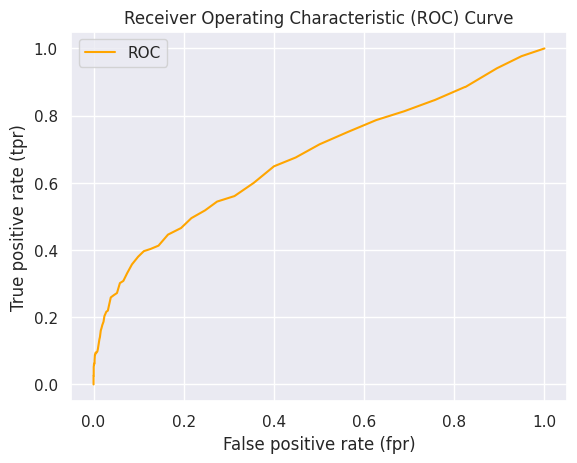

In [54]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.674768380763858

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [64]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[2614,    3],
       [ 287,   18]])

In [65]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,2614,3
1,287,18
